In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [8]:
data = []
data.append(pd.read_csv('data/data1.txt', sep='\t', header=None).values)
data.append(pd.read_csv('data/data2.txt', sep='\t', header=None).values)
data.append(pd.read_csv('data/data3.txt', sep='\t', header=None).values)
data.append(pd.read_csv('data/data4.txt', sep='\t', header=None).values)
data = np.array(data)

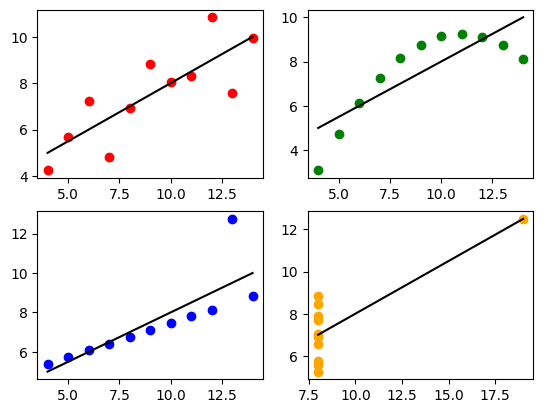

In [9]:
color_list = ['red', 'green', 'blue', 'orange']

fig, axes = plt.subplots(2,2)
for idx, axis in enumerate(axes.flatten()):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[idx][:,0], data[idx][:,1])
    
    axis.plot(data[idx][:,0], data[idx][:,1], 'o', color=color_list[idx]);
    line = np.arange(np.min(data[idx][:,0]), np.max(data[idx][:,0]) + 0.5, 0.5)
    axis.plot(line, line * slope + intercept, color="black")

In [10]:
new_list = ["".join(i.split(","))[:-1] for i in open("data/neighbors.csv", "r").readlines()]
import csv

with open("data/neighbors2.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerows(zip(new_list))

In [11]:
pd.read_csv("data/neighbors2.csv", header=None)

,0
0,10783185
1,2152920929
2,144365936
3,2284176
4,13154794
...,...
108797,1398415704
108798,31080741
108799,49953381
108800,5632949


In [12]:
def repeat(data, distribution_name):
    n = 10_000
    mean = data.mean()
    median = np.median(data)

    x = np.arange(1,n+1)
    y1 = pd.DataFrame(data).expanding().mean()      # mean
    y2 = pd.DataFrame(data).expanding().median()    # median
    y3 = pd.DataFrame(data).expanding().sem()       # standard error of the mean

    plt.plot(x, n * [mean])
    plt.errorbar(x.reshape(-1),np.array(y1).reshape(-1),yerr=np.array(y3).reshape(-1)/2,
                 color="black",
                 elinewidth=0,
                 capsize=2,
                 alpha=0.2)
    plt.plot(x, y1, color="red")
    plt.title(f'Mean plot for {distribution_name}')
    plt.show()
    plt.plot(x, n * [median])
    plt.plot(x, y2, color="red")
    plt.title(f'Median plot for {distribution_name}')
    plt.show()

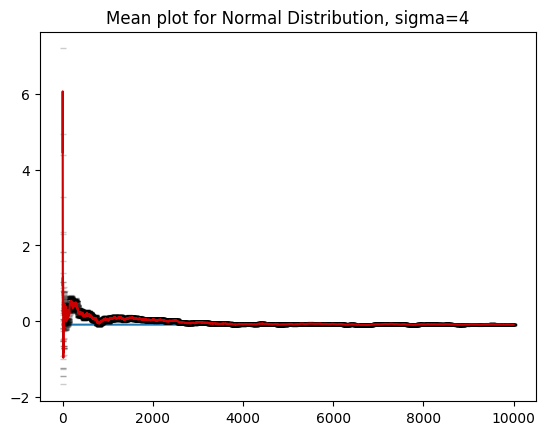

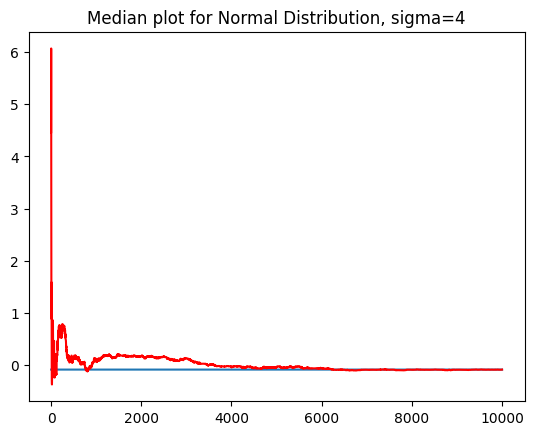

In [13]:
# Gaussian
n = 10_000
sigma = 4
data = np.random.standard_normal(n) * sigma
repeat(data, f'Normal Distribution, sigma={sigma}')

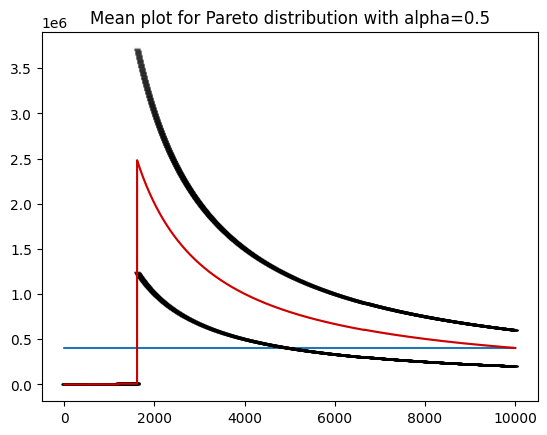

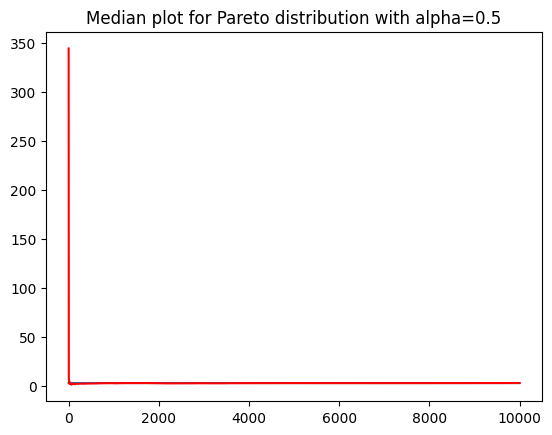

In [14]:
alpha = 0.5
data = np.random.pareto(alpha, n)  # xm = 1 by default
repeat(data, f'Pareto distribution with alpha={alpha}')

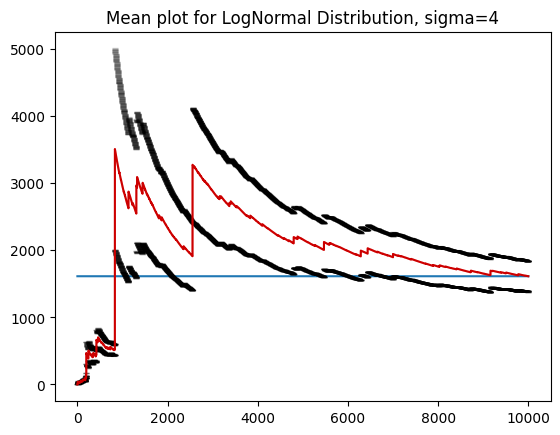

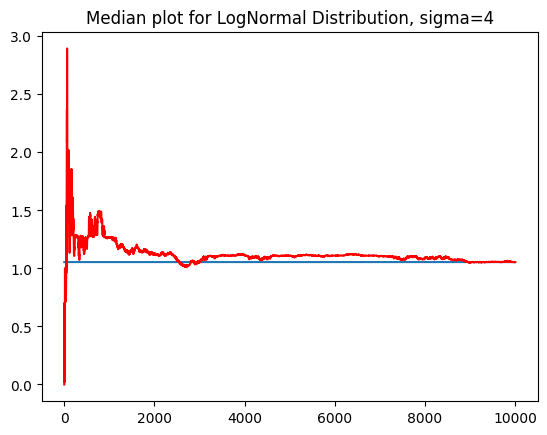

In [15]:
sigma = 4
data = np.random.lognormal(0, sigma, n)
repeat(data, f'LogNormal Distribution, sigma={sigma}')

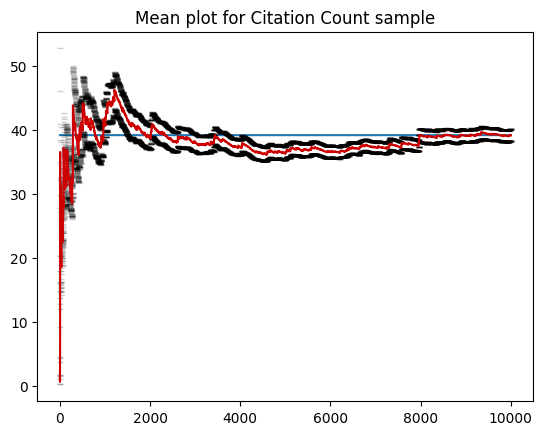

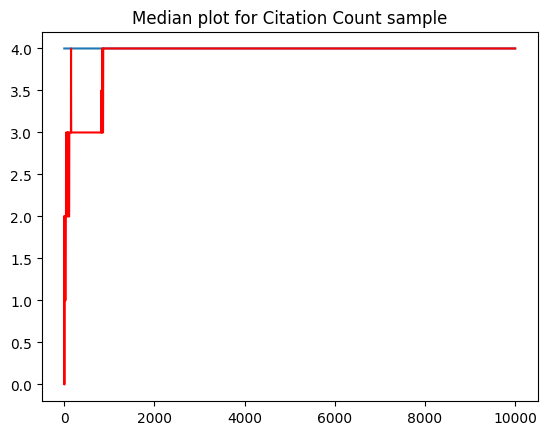

(39.2111, 4.0)

In [20]:
df_paper = pd.read_csv('data\\PaperDataset.csv')
np.random.seed(42)
data = np.random.choice(df_paper['Citation Count'], n, replace=False)
repeat(data, 'Citation Count sample')
data.mean(), np.median(data)

Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
In every case, apart from pareto, they tend towards the true mean.

Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases?
Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications?
What do you think are the main take-home message of this exercise?